<a href="https://colab.research.google.com/github/xiaochengJF/MachineLearning/blob/master/1%E3%80%81Linear_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [16]:
cd /content/gdrive/My Drive/MachineLearning/ex1-linear regression/

/content/gdrive/My Drive/MachineLearning/ex1-linear regression


In [0]:
import pandas as pd
import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="dark")
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [0]:
df = pd.read_csv('ex1data1.txt', names=['population','profit']) # 读取数据，并给定列名

In [19]:
df.head() # 看前五行

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
population    97 non-null float64
profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


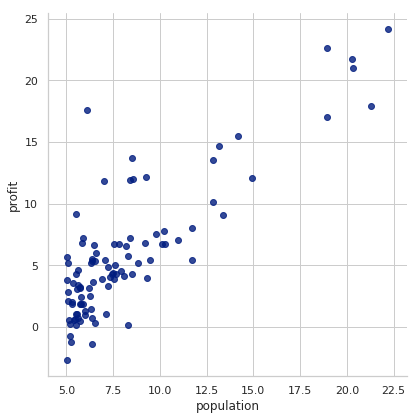

In [22]:
sns.lmplot('population','profit', df, size=6, fit_reg=False)
plt.show()

In [0]:
def get_X(df): # 读取特征
  """
  
  """
  ones = pd.DataFrame({'ones':np.ones(len(df))}) # ones是m行1列的DataFrame
  data = pd.concat([ones, df],aixs = 1) # 合并数据，根据列合并
  return data.iloc[: :-1].as_matrix() # 返回ndarray，不是矩阵

def get_y(df): # 读取标签
  """
  """
  return np.array(df.iloc[:,-1]) # df.iloc[:, -1]是df的最后一列

def normalize_feature(df):
  """
  """
  return df.apply(lambda column: (column.mean()) / column.std()) # 特征缩放

In [0]:
def linear_regression(X_data, y_data, alpha, optimizer=tf.train.GradientDescentOptimizer):
  # 创建占位符
  X = tf.placeholder(tf.float32, shape=X_data.shape)
  y = tf.palceholder(tf.float32, shape=y_data.shape)
  
  # 创建图形
  with tf.variable_scope('linear-regression'):
    W = tf.get_variable("weights",
                        (X_data.shape[1],1),
                        initializer=tf.constant_initializer()) # n*1
    y_pred = tf.matmul(X, W) # m*n @ n*1 -> m*1
    loss = 1 / (2 * len(X_data)) * tf.matmul((y_pred - y), (y_pred - y), transpose_a = True) #  (m*1).T @ m*1 = 1*1
    opt = optimizer(learning_rate=alpha)
    opt_operation = opt.minimize(loss)
    
    # 运行会话
    with th.Session() as sess:
      sess.run(tf.gloabal_variables_initializer())
      loss_data = []
      
      for i in range(epoch):
        _, loss_val, W_val = sess.run([opt_operation, loss, W], feed_dict={X: X_data, y: y_data})
        loss_data.append(loss_val[0,0]) # 每个loss_val 都是1*1 ndarray
        
        if len(loss_data) > 1 and np.abs(loss_data[-1] - loss_data[-2]) < 10 ** -9:# 收敛时提前跳出循环
          #print ("Converged as epoch {}".formaat(i))
          break
      # 清除图
      tf.reset_default_graph()
    return {'loss': loss_data, 'parameters': W_val} # 返回行向量的形式

In [26]:
data = pd.read_csv('ex1data1.txt', names= ['population', 'profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [28]:
X = get_X(data)
print(X.shape, type(X))

y = get_y(data)
print(y.shape, type(y)) # 查看数据维度

TypeError: ignored